<a href="https://colab.research.google.com/github/nispoe/GWU-SEAS-8525/blob/main/class-1/class-1-LatentSpacePyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The provided code defines and utilizes an Autoencoder neural network for the MNIST dataset. Here's a detailed explanation:

- **Autoencoder Class**: This class creates a neural network with encoder and decoder components. The encoder compresses the input image into a lower-dimensional latent space, and the decoder reconstructs the image from this latent space. The network is structured to flatten and process 28x28 grayscale MNIST images.

- **Data Loading**: Utilizes PyTorch's DataLoader to efficiently load the MNIST dataset, applying transformations to normalize the images.

- **Training Loop**: Iterates over the training dataset, feeding batches of images through the model, calculating the reconstruction loss, and updating the model's weights to minimize this loss, effectively learning to compress and reconstruct the input images.

- **Visualization**: After training, the script visualizes a batch of original images and their reconstructions from the autoencoder. It also prints the latent space representations, showcasing what the model has learned to encode.

- **Utility Functions**: Includes `imshow` for displaying tensors as images. It unnormalizes the data and uses Matplotlib to plot them.

This script encapsulates the end-to-end process of training an autoencoder on the MNIST dataset, visualizing the results, and examining the learned latent space.

In [17]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import numpy as np

 The `Autoencoder` class inherits from `nn.Module`, a base class for all neural network modules in PyTorch. Here's a breakdown of the code and its functionality:

### Initialization Method (`__init__`)
- **Parameters**: The `__init__` method accepts a single parameter `encoding_dim`, which specifies the size of the latent space where the input data is compressed.
- **Encoder**: The encoder part of the autoencoder is designed to compress the input data (in this case, an image) into a lower-dimensional representation called the latent space. It consists of a sequence of layers:
  - `nn.Linear(28 * 28, 128)`: This layer flattens the input image (assumed to be 28x28 pixels, typical for MNIST dataset images) into a one-dimensional array and performs a linear transformation to reduce its dimension to 128.
  - `nn.ReLU(True)`: A Rectified Linear Unit (ReLU) activation function is applied to introduce non-linearity, helping the model learn complex patterns.
  - Another `nn.Linear(128, encoding_dim)`: Further reduces the dimension from 128 to the specified `encoding_dim`.
  - Another `nn.ReLU(True)`: Another ReLU activation for non-linearity.
- **Decoder**: The decoder part reconstructs the original input data from the compressed representation. It mirrors the encoder structure but in reverse, aiming to expand the compressed data back to its original shape:
  - `nn.Linear(encoding_dim, 128)`: Expands the compressed data from `encoding_dim` back to 128.
  - `nn.ReLU(True)`: Applies ReLU activation.
  - `nn.Linear(128, 28 * 28)`: Transforms the data from 128 back to the flattened image size of 784 (28x28).
  - `nn.Sigmoid()`: Applies a sigmoid activation function to ensure the output values are between 0 and 1, suitable for image data where pixel values typically fall within this range.

### Forward Method (`forward`)
- **Parameter**: The `forward` method defines how the input `x` flows through the network.
- **Process**:
  - `x.view(-1, 28*28)`: First, the input `x` is reshaped into a one-dimensional array (flattened) if not already done.
  - `self.encoder(x)`: The flattened `x` is then passed through the encoder.
  - `self.decoder(x)`: The output from the encoder, which is the compressed representation, is fed into the decoder.
- **Output**: The final output is reshaped back to the original image dimensions (`-1, 1, 28, 28`), where `-1` is a placeholder that automatically adjusts based on the batch size.


In [18]:
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        # Encoder: compresses the image into a lower-dimensional latent space
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),  # Flatten the image and then linearly transform it
            nn.ReLU(True),  # Non-linear activation function
            nn.Linear(128, encoding_dim),  # Linear transformation to the encoding dimension
            nn.ReLU(True)  # Non-linear activation function
        )
        # Decoder: reconstructs the image from the latent space
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),  # Linearly transforms the encoding
            nn.ReLU(True),  # Non-linear activation function
            nn.Linear(128, 28 * 28),  # Transforms back to original image shape
            nn.Sigmoid()  # Sigmoid activation to output values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x.view(-1, 28*28))  # Encode the input image
        x = self.decoder(x)  # Decode the encoded image
        return x.view(-1, 1, 28, 28)  # Reshape to the original image dimensions

In [19]:

def imshow(img):
    img = img.cpu() / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()  # Convert the tensor to a numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Reshape and display the image
    plt.show()

In [20]:
# Transform: converts images to PyTorch tensors and normalizes them
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [21]:
import os
import urllib.request
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

mnist_dir = "./data/MNIST/raw/"
os.makedirs(mnist_dir, exist_ok=True)

base_url = "https://github.com/nispoe/GWU-SEAS-8525/raw/main/class-1/"
files = [
    "train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz"
]

for file in files:
    file_path = os.path.join(mnist_dir, file)
    if not os.path.exists(file_path):
        print(f"Downloading {file}...")
        urllib.request.urlretrieve(base_url + file, file_path)

transform = transforms.Compose([transforms.ToTensor()])

In [22]:
import gzip
import shutil

gz_files = [f for f in os.listdir(mnist_dir) if f.endswith(".gz")]

for file in gz_files:
    gz_path = os.path.join(mnist_dir, file)
    output_path = gz_path.replace(".gz", "")  # Remove .gz extension

    # Extract the file
    with gzip.open(gz_path, 'rb') as f_in:
        with open(output_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [23]:
# MNIST dataset loading
#train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
train_dataset = MNIST(root='./data', train=True, download=False, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder(encoding_dim=64).to(device)
criterion = nn.MSELoss()  # Loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  # Optimizer

In [25]:
from torch.amp import GradScaler, autocast  # Updated import

# Correct way to initialize GradScaler
scaler = GradScaler(device="cuda")  # New syntax
num_epochs = 10

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.to(device)

        with autocast(device_type="cuda"):  # Updated syntax
            output = model(img)
            loss = criterion(output, img)

        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0212
Epoch [2/10], Loss: 0.0154
Epoch [3/10], Loss: 0.0132
Epoch [4/10], Loss: 0.0098
Epoch [5/10], Loss: 0.0098
Epoch [6/10], Loss: 0.0090
Epoch [7/10], Loss: 0.0084
Epoch [8/10], Loss: 0.0092
Epoch [9/10], Loss: 0.0071
Epoch [10/10], Loss: 0.0081


Original Images


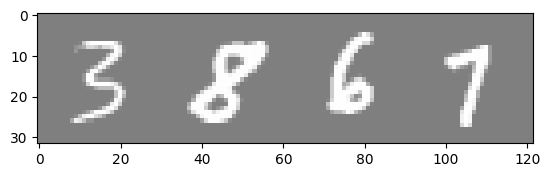

Original Representation
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
       

In [26]:
# Visualization of the original and reconstructed images
dataiter = iter(train_loader)
images, _ = next(dataiter)
images = images.to(device)

# Display original images
print("Original Images")
imshow(vutils.make_grid(images[:4], normalize=True))

# Encoded and decoded images
with torch.no_grad():
    encoded_imgs = model.encoder(images.view(-1, 28*28)[:4])
    decoded_imgs = model.decoder(encoded_imgs).view(-1, 1, 28, 28)


# Display reconstructed images
print("Original Representation")
print(img)

# Print latent space
print("Latent space representations:")
print(encoded_imgs)

Exploring and Experimenting:
## 1) Reproducible Seed + Consistent MNIST Data Reload (matches Sigmoid output)
We ensure pixels are in **[0,1]** using `ToTensor()` only (no normalization), set `download=True` for Colab, and reseed for reproducibility.


In [27]:

import torch, random, numpy as np, time
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST

def seed_all(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
seed_all(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Use ToTensor() only; keep targets and outputs in [0,1] (pairs with Sigmoid)
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset  = MNIST(root="./data", train=False, download=True, transform=transform)
train_loader  = DataLoader(train_dataset, batch_size=128, shuffle=True,  num_workers=2, pin_memory=True)
test_loader   = DataLoader(test_dataset,  batch_size=128, shuffle=False, num_workers=2, pin_memory=True)

len(train_dataset), len(test_dataset), device


(60000, 10000, device(type='cuda'))


## 2) Latent Extraction & 2D Visualization (PCA fallback if latent dim > 2)
We probe `model.encoder(x)` to get latent codes `z`, then visualize in 2D. If latent dimension > 2, we reduce using PCA.


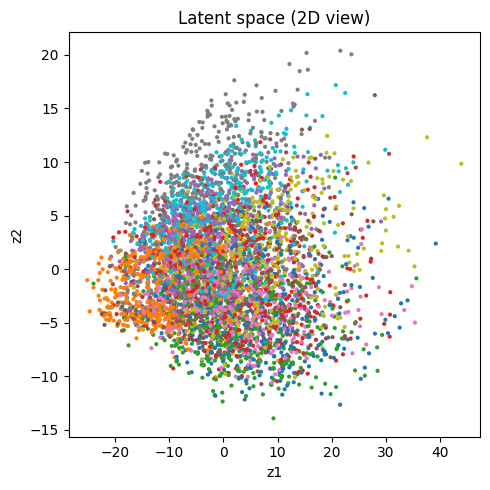

In [28]:

import matplotlib.pyplot as plt

# Expect an existing `model` with `encoder` and `decoder`. If not defined, define a small fallback AE.
if 'model' not in globals():
    import torch.nn as nn
    class Autoencoder(nn.Module):
        def __init__(self, zdim=16):
            super().__init__()
            self.encoder = nn.Sequential(
                nn.Linear(28*28, 256), nn.ReLU(),
                nn.Linear(256, zdim)
            )
            self.decoder = nn.Sequential(
                nn.Linear(zdim, 256), nn.ReLU(),
                nn.Linear(256, 28*28), nn.Sigmoid()
            )
        def forward(self, x):
            z = self.encoder(x)
            xhat = self.decoder(z)
            return xhat
    model = Autoencoder(zdim=16).to(device)

model.eval()
latents, labels = [], []
with torch.no_grad():
    for imgs, y in train_loader:
        x = imgs.view(-1, 28*28).to(device)
        if hasattr(model, 'encoder'):
            z = model.encoder(x)
        else:
            z = x  # fallback
        latents.append(z.detach().cpu().numpy())
        labels.append(y.numpy())
latents = np.concatenate(latents, axis=0)
labels = np.concatenate(labels, axis=0)

# 2D projection if needed
try:
    from sklearn.decomposition import PCA
    Z2 = PCA(n_components=2).fit_transform(latents) if latents.shape[1] > 2 else latents
except Exception:
    Z2 = latents[:, :2]

plt.figure(figsize=(5,5))
plt.scatter(Z2[:5000,0], Z2[:5000,1], s=4, c=labels[:5000], cmap="tab10")
plt.title("Latent space (2D view)")
plt.xlabel("z1"); plt.ylabel("z2")
plt.tight_layout()
plt.show()



## 3) Latent Interpolation (decode a path in latent space)
Pick two images, encode to `z_a, z_b`, linearly interpolate, and decode each step. This reveals how the model organizes the manifold.


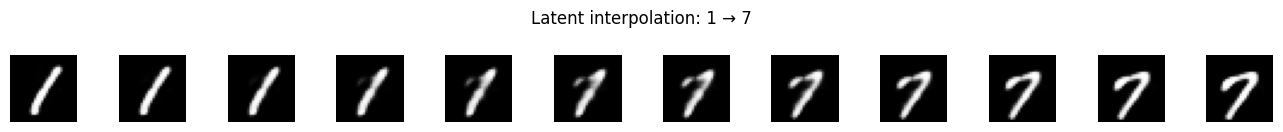

In [29]:

def lerp(a,b,t): return (1-t)*a + t*b

# Picked examples from different classes if possible
a_class, b_class = 1, 7  # change classes here
a_img = next((img for img, y in train_dataset if y==a_class), None)
b_img = next((img for img, y in train_dataset if y==b_class), None)
if a_img is None or b_img is None:
    a_img = train_dataset[0][0]
    b_img = train_dataset[1][0]

with torch.no_grad():
    xa = a_img.view(1, 28*28).to(device)
    xb = b_img.view(1, 28*28).to(device)
    za = model.encoder(xa) if hasattr(model, 'encoder') else xa
    zb = model.encoder(xb) if hasattr(model, 'encoder') else xb

steps = 12
decoded = []
with torch.no_grad():
    for k in range(steps):
        t = k/(steps-1)
        zt = lerp(za, zb, t)
        xh = model.decoder(zt) if hasattr(model, 'decoder') else model(zt)
        decoded.append(xh.view(28,28).cpu().numpy())

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, steps, figsize=(steps*1.1, 1.3))
for i, ax in enumerate(axes):
    ax.imshow(decoded[i], cmap="gray"); ax.axis("off")
fig.suptitle(f"Latent interpolation: {a_class} → {b_class}")
plt.tight_layout()
plt.show()



## 4) Bottleneck Sweep (latent size vs. reconstruction error)
Train small fully-connected AEs with `zdim ∈ {2, 8, 16, 32}` for a few epochs and plot final MSE.


zdim= 2  test MSE=0.04674
zdim= 8  test MSE=0.02272
zdim=16  test MSE=0.01502
zdim=32  test MSE=0.01015


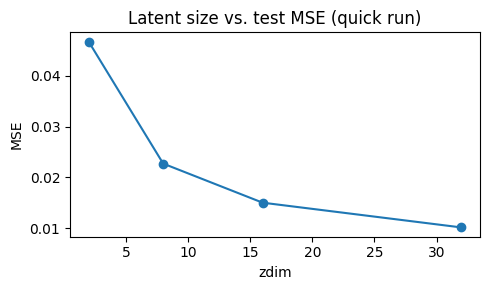

In [30]:

import torch.nn as nn, matplotlib.pyplot as plt

class FC_AE(nn.Module):
    def __init__(self, zdim=16):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 256), nn.ReLU(),
            nn.Linear(256, zdim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(zdim, 256), nn.ReLU(),
            nn.Linear(256, 28*28), nn.Sigmoid()
        )
    def forward(self, x):
        z = self.encoder(x); xh = self.decoder(z); return xh

def train_quick(zdim=16, epochs=3, lr=1e-3):
    m = FC_AE(zdim).to(device)
    opt = torch.optim.Adam(m.parameters(), lr=lr)
    crit = torch.nn.MSELoss()
    m.train()
    for ep in range(epochs):
        for imgs, _ in train_loader:
            x = imgs.view(-1, 28*28).to(device)
            opt.zero_grad()
            xh = m(x)
            loss = crit(xh, x)
            loss.backward(); opt.step()
    # Evaluate on test set
    m.eval(); losses=[]
    with torch.no_grad():
        for imgs, _ in test_loader:
            x = imgs.view(-1, 28*28).to(device)
            xh = m(x)
            losses.append(((xh-x)**2).mean().item())
    return m, float(np.mean(losses))

zlist = [2, 8, 16, 32]
scores = []
for zdim in zlist:
    _, mse = train_quick(zdim=zdim, epochs=3, lr=1e-3)
    scores.append(mse)
    print(f"zdim={zdim:>2}  test MSE={mse:.5f}")

plt.figure(figsize=(5,3))
plt.plot(zlist, scores, marker='o')
plt.title("Latent size vs. test MSE (quick run)")
plt.xlabel("zdim"); plt.ylabel("MSE"); plt.tight_layout(); plt.show()



## 5) Denoising Autoencoder (robustness to noise)
Corrupt inputs with Gaussian noise and train to reconstruct the clean image. Sweep a few noise levels and compare MSE.


noise_std=0.10  test MSE=0.01540
noise_std=0.20  test MSE=0.01658
noise_std=0.30  test MSE=0.01850


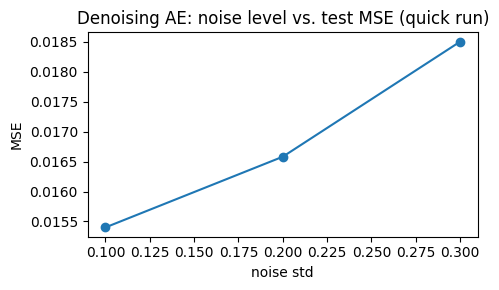

In [31]:

def train_denoise(noise_std=0.2, epochs=3, lr=1e-3):
    m = FC_AE(16).to(device)
    opt = torch.optim.Adam(m.parameters(), lr=lr)
    crit = torch.nn.MSELoss()
    m.train()
    for ep in range(epochs):
        for imgs, _ in train_loader:
            x = imgs.view(-1,28*28).to(device)
            x_noisy = torch.clamp(x + noise_std*torch.randn_like(x), 0.0, 1.0)
            opt.zero_grad()
            xh = m(x_noisy)
            loss = crit(xh, x)  # target is clean x
            loss.backward(); opt.step()
    m.eval(); losses=[]
    with torch.no_grad():
        for imgs, _ in test_loader:
            x = imgs.view(-1,28*28).to(device)
            x_noisy = torch.clamp(x + noise_std*torch.randn_like(x), 0.0, 1.0)
            xh = m(x_noisy)
            losses.append(((xh-x)**2).mean().item())
    return float(np.mean(losses))

noise_list = [0.1, 0.2, 0.3]
mse_list = [train_denoise(s) for s in noise_list]
for s, mval in zip(noise_list, mse_list):
    print(f"noise_std={s:.2f}  test MSE={mval:.5f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.plot(noise_list, mse_list, marker='o')
plt.title("Denoising AE: noise level vs. test MSE (quick run)")
plt.xlabel("noise std"); plt.ylabel("MSE"); plt.tight_layout(); plt.show()



## 6) OOD Reconstruction Error: FashionMNIST vs MNIST (AUROC if available)
Train a small AE on **MNIST** and compare reconstruction error on **MNIST test** vs **FashionMNIST test**. We also compute AUROC if `sklearn` is available.


MNIST test mean MSE:   0.01463
FashionMNIST mean MSE: 0.10364


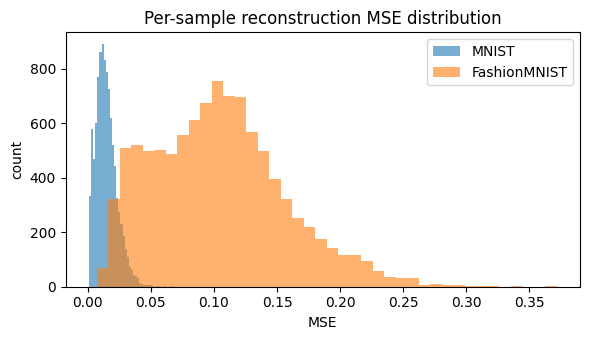

AUROC (MNIST=0 vs FashionMNIST=1) = 0.987


In [32]:

from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

# Train a fresh model on MNIST
m = FC_AE(16).to(device)
opt = torch.optim.Adam(m.parameters(), lr=1e-3)
crit = torch.nn.MSELoss()
m.train()
for ep in range(3):
    for imgs, _ in train_loader:
        x = imgs.view(-1,28*28).to(device)
        opt.zero_grad()
        xh = m(x)
        loss = crit(xh, x)
        loss.backward(); opt.step()

# Collect per-sample MSE on MNIST test
def collect_mse(model, loader):
    model.eval()
    scores = []
    with torch.no_grad():
        for imgs, _ in loader:
            x = imgs.view(-1,28*28).to(device)
            xh = model(x)
            per = ((xh-x)**2).mean(dim=1)  # per-sample MSE
            scores.append(per.cpu().numpy())
    return np.concatenate(scores)

mnist_scores = collect_mse(m, test_loader)

# FashionMNIST as OOD
fm_test = FashionMNIST(root="./data", train=False, download=True, transform=transform)
fm_loader = DataLoader(fm_test, batch_size=128, shuffle=False, num_workers=2, pin_memory=True)
fmnist_scores = collect_mse(m, fm_loader)

print(f"MNIST test mean MSE:   {mnist_scores.mean():.5f}")
print(f"FashionMNIST mean MSE: {fmnist_scores.mean():.5f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(6,3.5))
plt.hist(mnist_scores, bins=40, alpha=0.6, label="MNIST")
plt.hist(fmnist_scores, bins=40, alpha=0.6, label="FashionMNIST")
plt.title("Per-sample reconstruction MSE distribution")
plt.xlabel("MSE"); plt.ylabel("count"); plt.legend(); plt.tight_layout(); plt.show()

# AUROC if sklearn is available
try:
    from sklearn.metrics import roc_auc_score
    y_true = np.concatenate([np.zeros_like(mnist_scores), np.ones_like(fmnist_scores)])
    y_score = np.concatenate([mnist_scores, fmnist_scores])
    auroc = roc_auc_score(y_true, y_score)
    print(f"AUROC (MNIST=0 vs FashionMNIST=1) = {auroc:.3f}")
except Exception as e:
    print("sklearn not available for AUROC; skipping. Error:", e)
